<h1>Netflix Project</h1>
<ul>
<li>The exploration should have a goal. As you explore the data, keep in mind that you want to answer which type of shows to produce and how to grow the business.</li>
<li>Ensure each recommendation is backed by data. The company is looking for data-driven insights, not personal opinions or anecdotes.</li>
<li>Assume that you are presenting your findings to business executives who have only a basic understanding of data science. Avoid unnecessary technical jargon.</li>
<li>Start by exploring a few questions: What type of content is available in different countries?</li>
<li>How has the number of movies released per year changed over the last 20-30 years?</li>
<li>Comparison of tv shows vs. movies.</li>
<li>What is the best time to launch a TV show?</li>
<li>Analysis of actors/directors of different types of shows/movies.</li>
</ul>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
df.shape

(8807, 12)

In [7]:
df['show_id'].nunique()

8807

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [9]:
df['cast'].isna()

0        True
1       False
2       False
3        True
4       False
        ...  
8802    False
8803     True
8804    False
8805    False
8806    False
Name: cast, Length: 8807, dtype: bool

In [10]:
df['cast'].isna().sum()

np.int64(825)

In [11]:
df['cast'].isna().sum()

np.int64(825)

In [12]:
df['cast'].replace(np.nan,'Others',inplace=True)

In [13]:
df['cast'].isna().sum()

np.int64(0)

In [14]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Others,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,Others,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [15]:
def function(x):

  return x.split(', ')

df['cast'] = df['cast'].apply(function)

In [16]:
df['cast'][1]

['Ama Qamata',
 'Khosi Ngema',
 'Gail Mabalane',
 'Thabang Molaba',
 'Dillon Windvogel',
 'Natasha Thahane',
 'Arno Greeff',
 'Xolile Tshabalala',
 'Getmore Sithole',
 'Cindy Mahlangu',
 'Ryle De Morny',
 'Greteli Fincham',
 'Sello Maake Ka-Ncube',
 'Odwa Gwanya',
 'Mekaila Mathys',
 'Sandi Schultz',
 'Duane Williams',
 'Shamilla Miller',
 'Patrick Mofokeng']

In [17]:
df['cast'][2]

['Sami Bouajila',
 'Tracy Gotoas',
 'Samuel Jouy',
 'Nabiha Akkari',
 'Sofia Lesaffre',
 'Salim Kechiouche',
 'Noureddine Farihi',
 'Geert Van Rampelberg',
 'Bakary Diombera']

In [18]:
df['director'].isna().sum()

np.int64(2634)

In [19]:
df['type'].unique()


array(['Movie', 'TV Show'], dtype=object)

In [20]:
df.shape

(8807, 12)

In [21]:
temp_df = df[df['director'].isna()]
temp_df.shape

(2634, 12)

In [22]:
temp_df.groupby(by=['type'])['show_id'].count()

type
Movie       188
TV Show    2446
Name: show_id, dtype: int64

In [23]:
df.groupby(by=['type'])['show_id'].count()

type
Movie      6131
TV Show    2676
Name: show_id, dtype: int64

In [24]:
df.groupby(by=['type'])['show_id'].count()

type
Movie      6131
TV Show    2676
Name: show_id, dtype: int64

In [25]:
df['director'].replace(np.nan,'No Director',inplace=True)

In [26]:
df.head(30)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,[Others],United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,No Director,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,No Director,[Others],NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,No Director,"[Mayur More, Jitendra Kumar, Ranjan Raj, Alam ...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"[Kate Siegel, Zach Gilford, Hamish Linklater, ...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","[Vanessa Hudgens, Kimiko Glenn, James Marsden,...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"[Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra ...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"[Mel Giedroyc, Sue Perkins, Mary Berry, Paul H...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"[Melissa McCarthy, Chris O'Dowd, Kevin Kline, ...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [27]:
df[df['title'].str.lower().str.contains('game')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
33,s34,TV Show,Squid Game,No Director,"[Lee Jung-jae, Park Hae-soo, Wi Ha-jun, Oh You...",NaN,"September 17, 2021",2021,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Thrillers",Hundreds of cash-strapped players accept a str...
331,s332,TV Show,Darwin’s Game,No Director,"[Yusuke Kobayashi, Reina Ueda, Nichika Omori, ...",NaN,"August 1, 2021",2020,TV-MA,1 Season,"Anime Series, International TV Shows, TV Thril...",High schooler Kaname activates a mysterious mo...
600,s601,Movie,The Game,David Fincher,"[Michael Douglas, Sean Penn, Deborah Kara Unge...",United States,"July 1, 2021",1997,R,129 min,Thrillers,An aloof investment banker's life spirals into...
666,s667,TV Show,Gameboys Level-Up Edition,Ivan Andrew Payawal,"[Kokoy De Santos, Elijah Canlas, Adrianna So, ...",NaN,"June 19, 2021",2020,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...","In this recut of the popular web series, live-..."
687,s688,Movie,Jagame Thandhiram,Karthik Subbaraj,"[Dhanush, Aishwarya Lekshmi, James Cosmo, Joju...",NaN,"June 18, 2021",2021,TV-MA,159 min,"Action & Adventure, Dramas, International Movies","When a clever, carefree gangster is recruited ..."
938,s939,Movie,Motu Patlu in the Game of Zones,Suhas Kadav,[Saurav Chakraborty],NaN,"May 1, 2021",2019,TV-Y7,87 min,"Children & Family Movies, Comedies, Music & Mu...",A board game becomes all too real for buddies ...
1147,s1148,Movie,Not a Game,Jose Gomez,[Brendon Mcdonnell],United Kingdom,"March 31, 2021",2020,TV-MA,98 min,"Documentaries, International Movies, Sports Mo...",This documentary offers an honest look at our ...
1480,s1481,TV Show,Still Game,No Director,"[Ford Kiernan, Paul Riley, Jane McCarry, Greg ...",United Kingdom,"December 30, 2020",2018,TV-14,9 Seasons,"British TV Shows, Classic & Cult TV, Internati...",Scottish pensioners Jack and Victor make the m...
1585,s1586,TV Show,Manhunt: Deadly Games,No Director,"[Cameron Britton, Jack Huston, Judith Light, C...",NaN,"December 7, 2020",2020,TV-14,1 Season,"Crime TV Shows, TV Dramas, TV Mysteries","Despite his heroics, security guard Richard Je..."
1888,s1889,Movie,Good Game: The Beginning,Umut Aral,"[Mert Yazıcıoğlu, Afra Saraçoğlu, Yiğit Kirazc...",Turkey,"October 3, 2020",2018,TV-14,115 min,"Dramas, International Movies, Sports Movies",New high school grad and avid gamer Cenk is re...


In [28]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,[Others],United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,No Director,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,No Director,[Others],NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,No Director,"[Mayur More, Jitendra Kumar, Ranjan Raj, Alam ...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [29]:
df['release_year'].value_counts().head()

release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
Name: count, dtype: int64

In [30]:
temp = df.groupby(by=['release_year','type'])['show_id'].count().reset_index()

In [31]:
temp = temp[temp['release_year'].isin([2016,2017,2018,2019,2020])]
temp

,release_year,type,show_id
107,2016,Movie,658
108,2016,TV Show,244
109,2017,Movie,767
110,2017,TV Show,265
111,2018,Movie,767
112,2018,TV Show,380
113,2019,Movie,633
114,2019,TV Show,397
115,2020,Movie,517
116,2020,TV Show,436


In [32]:
temp['release_year'].dtype

dtype('int64')

In [33]:
movie = temp[temp['type']=='Movie']
show = temp[temp['type']=='TV Show']

<BarContainer object of 5 artists>

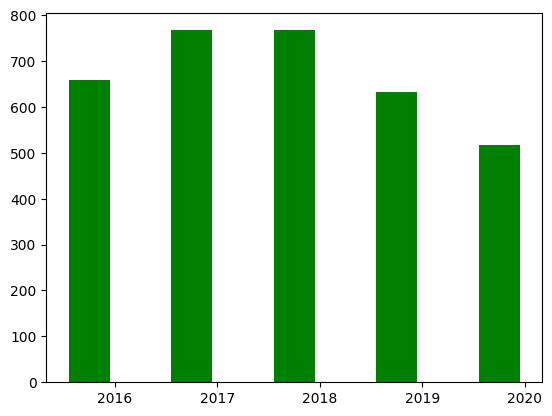

In [34]:
plt.bar(x=movie['release_year']-0.25,height=movie['show_id'],color='green',width=0.4)

<BarContainer object of 5 artists>

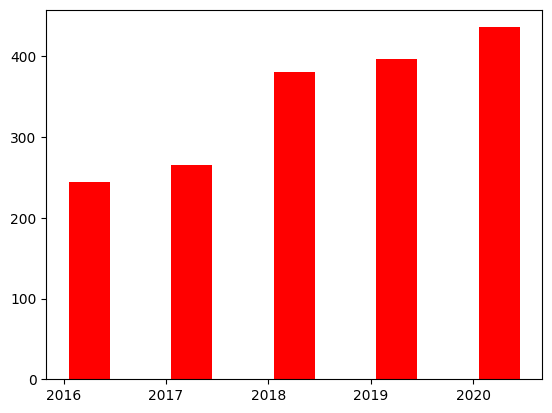

In [35]:
plt.bar(x=show['release_year']+0.25,height=show['show_id'],color='red',width=0.4)

<BarContainer object of 5 artists>

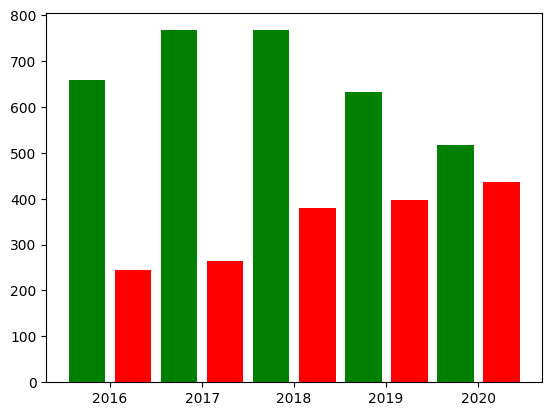

In [36]:
plt.bar(x=movie['release_year']-0.25,height=movie['show_id'],color='green',width=0.4)
plt.bar(x=show['release_year']+0.25,height=show['show_id'],color='red',width=0.4)

In [37]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,[Others],United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,No Director,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [38]:
df['release_year'].isna().sum()

np.int64(0)

In [39]:
df['date_added'].isna().sum()

np.int64(10)

In [40]:
df[df['date_added'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,No Director,"[Daniel Radcliffe, Jon Hamm, Adam Godley, Chri...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,No Director,[Anthony Bourdain],United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,No Director,"[Kelsey Grammer, Jane Leeves, David Hyde Pierc...",United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,No Director,"[Jennifer Aniston, Courteney Cox, Lisa Kudrow,...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,No Director,"[Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, A...",Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,No Director,[Igor Dmitriev],NaN,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,No Director,"[Eugenio Derbez, Consuelo Duval, Luis Manuel Á...",United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,No Director,"[Marc Maron, Judd Hirsch, Josh Brener, Nora Ze...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,No Director,"[Burnie Burns, Jason Saldaña, Gustavo Sorola, ...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,No Director,"[Luke Jurevicius, Craig Behenna, Charlotte Ham...",Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [41]:
df[df['rating'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,No Director,"[Oprah Winfrey, Ava DuVernay]",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,No Director,"[Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, K...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,No Director,"[Flynn Curry, Olivia Deeble, Madison Lu, Oisín...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"[Leone Frisa, Paolo Vaccarino, Francesco Migli...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [42]:
df[df['duration'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,[Louis C.K.],United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,[Louis C.K.],United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,[Louis C.K.],United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [43]:
df.loc[df['duration'].isna(),'duration'] = df.loc[df['duration'].isna(),'rating']

In [44]:
df[df['duration'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [45]:
df.loc[[5541,5794,5813]]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,[Louis C.K.],United States,"April 4, 2017",2017,74 min,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,[Louis C.K.],United States,"September 16, 2016",2010,84 min,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,[Louis C.K.],United States,"August 15, 2016",2015,66 min,66 min,Movies,The comic puts his trademark hilarious/thought...


In [46]:
df.loc[[5541,5794,5813],'rating'] = np.nan

In [47]:
df.loc[[5541,5794,5813]]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,[Louis C.K.],United States,"April 4, 2017",2017,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,[Louis C.K.],United States,"September 16, 2016",2010,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,[Louis C.K.],United States,"August 15, 2016",2015,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...


In [48]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', nan, 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [49]:
df[df['duration'].isin(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R','TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'])]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [50]:
df['country'].isna().sum()

np.int64(831)

In [51]:
df.loc[df['country'].isna(),'country']='Country Not Mentioned'

In [52]:
df['country'].isna().sum()

np.int64(0)

In [53]:
def function(x):

  return x.split(', ')

df['listed_in'] = df['listed_in'].apply(function)

In [54]:
df['listed_in'][2]

['Crime TV Shows', 'International TV Shows', 'TV Action & Adventure']

In [55]:
df.sample(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5058,s5059,Movie,Holy Camp!,"Javier Ambrossi, Javier Calvo","[Macarena García, Anna Castillo, Belén Cuesta,...",Spain,"January 29, 2018",2017,TV-MA,108 min,"[Comedies, Dramas, Faith & Spirituality]","In this musical comedy, two rebellious teen gi..."
383,s384,Movie,Department,Ram Gopal Varma,"[Amitabh Bachchan, Sanjay Dutt, Rana Daggubati...",India,"July 27, 2021",2012,TV-MA,143 min,"[Action & Adventure, International Movies]",Two cops form a task force to take down two mo...


In [56]:
def function(x):

  if ', ' in x:
    return True
  else:
    return False

df[df['director'].apply(function)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","[Vanessa Hudgens, Kimiko Glenn, James Marsden,...",Country Not Mentioned,"September 24, 2021",2021,PG,91 min,[Children & Family Movies],Equestria's divided. But a bright-eyed hero be...
16,s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,"Pedro de Echave García, Pablo Azorín Williams",[Others],Country Not Mentioned,"September 22, 2021",2020,TV-MA,67 min,"[Documentaries, International Movies]",Declassified documents reveal the post-WWII li...
23,s24,Movie,Go! Go! Cory Carson: Chrissy Takes the Wheel,"Alex Woo, Stanley Moore","[Maisie Benson, Paul Killam, Kerry Gudjohnsen,...",Country Not Mentioned,"September 21, 2021",2021,TV-Y,61 min,[Children & Family Movies],From arcade games to sled days and hiccup cure...
30,s31,Movie,Ankahi Kahaniya,"Ashwiny Iyer Tiwari, Abhishek Chaubey, Saket C...","[Abhishek Banerjee, Rinku Rajguru, Delzad Hiwa...",Country Not Mentioned,"September 17, 2021",2021,TV-14,111 min,"[Dramas, Independent Movies, International Mov...","As big city life buzzes around them, lonely so..."
68,s69,Movie,Schumacher,"Hanns-Bruno Kammertöns, Vanessa Nöcker, Michae...",[Michael Schumacher],Country Not Mentioned,"September 15, 2021",2021,TV-14,113 min,"[Documentaries, International Movies, Sports M...",Through exclusive interviews and archival foot...
...,...,...,...,...,...,...,...,...,...,...,...,...
8727,s8728,Movie,When Hari Got Married,"Ritu Sarin, Tenzing Sonam",[Others],"United Kingdom, India, United States","December 25, 2016",2013,NR,75 min,"[Documentaries, International Movies]",A small-town taxi driver is arranged to be mar...
8728,s8729,Movie,When Two Worlds Collide,"Heidi Brandenburg, Mathew Orzel",[Others],"Peru, United States, United Kingdom","November 30, 2016",2016,TV-14,103 min,"[Documentaries, International Movies]",This documentary takes a hard look at how indi...
8737,s8738,Movie,Why Are We Getting So Fat?,"Milla Harrison-Hansley, Alicky Sussman",[Giles Yeo],United Kingdom,"February 1, 2019",2016,TV-14,50 min,[Documentaries],A Cambridge geneticist dispels misconceptions ...
8739,s8740,Movie,Why We Fight: The Battle of Russia,"Frank Capra, Anatole Litvak",[Others],United States,"March 31, 2017",1943,TV-PG,82 min,[Documentaries],This installment of Frank Capra's acclaimed do...


In [57]:
def function(x):

  return x.split(', ')

df['director'] = df['director'].apply(function)

In [58]:
df.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4351,s4352,Movie,A Christmas Prince: The Royal Wedding,[John Schultz],"[Rose McIver, Ben Lamb, Alice Krige, Simon Dut...",United States,"November 30, 2018",2018,TV-PG,93 min,"[Children & Family Movies, Dramas, Romantic Mo...","A year after helping Richard secure the crown,..."
4314,s4315,Movie,Vir Das: Losing It,[Marcus Raboy],[Vir Das],United States,"December 11, 2018",2018,TV-MA,68 min,[Stand-Up Comedy],"The world's got a lot of problems, but Vir Das..."
6904,s6905,Movie,Hükümet Kadin,[Sermiyan Midyat],"[Demet Akbağ, Sermiyan Midyat, Mahir İpek, Gül...",Turkey,"March 10, 2017",2013,TV-MA,100 min,"[Comedies, International Movies]",When an uneducated mother of eight suddenly be...
899,s900,Movie,Illegal Woman,[Ramon Térmens],"[Daniel Faraldo, Isak Férriz, Yolanda Sey, Raq...",Spain,"May 11, 2021",2020,TV-MA,119 min,"[Dramas, International Movies]",An immigration lawyer and a Nigerian woman cau...
2629,s2630,Movie,Bheeshma,[Venky Kudumula],"[Nitin Reddy, Rashmika Mandanna, Sampath Raj, ...",India,"April 25, 2020",2020,TV-14,138 min,"[Action & Adventure, Comedies, International M...","Tired of being single, a smart-aleck meme crea..."


In [59]:
def function(x):

    length=int(x.split(' ')[0])

    if length<=30:
        return "0-30"
    elif length<=60:
        return "31-60"
    elif length<=90:
        return "61-90"
    elif length<=120:
        return "91-120"
    elif length<=150:
        return "121-150"
    elif length<=180:
        return "151-180"
    else:
        return "Above 180"

In [61]:
df.loc[df['type']=='Movie','duration'] = df.loc[df['type']=='Movie','duration'].apply(function)

In [62]:
df.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
358,s359,Movie,The Net,[Irwin Winkler],"[Sandra Bullock, Jeremy Northam, Dennis Miller...",United States,"August 1, 2021",1995,PG-13,91-120,[Thrillers],A computer analyst becomes a target after she ...
491,s492,Movie,Home Again,[Hallie Meyers-Shyer],"[Reese Witherspoon, Michael Sheen, Candice Ber...",United States,"July 8, 2021",2017,PG-13,91-120,"[Comedies, Dramas, Romantic Movies]",A newly single mom takes in three young male f...
7332,s7333,Movie,Lolita,[Stanley Kubrick],"[James Mason, Shelley Winters, Peter Sellers, ...","United Kingdom, United States","November 1, 2019",1962,R,151-180,"[Classic Movies, Dramas, Romantic Movies]","In this black comedy, an English professor mar..."
3411,s3412,Movie,Up North,[Tope Oshin],"[Banky Wellington, Rahama Sadau, Kanayo O. Kan...",Nigeria,"October 18, 2019",2018,TV-14,91-120,"[Dramas, International Movies]",A pampered heir must complete a year of servic...
1626,s1627,Movie,The Happytime Murders,[Brian Henson],"[Melissa McCarthy, Elizabeth Banks, Maya Rudol...","United States, China, Canada","December 1, 2020",2018,R,91-120,"[Action & Adventure, Comedies]","In an LA where puppets and humans coexist, a d..."


In [63]:
df.loc[df['type']=='Movie','duration'].value_counts()


duration
91-120       2996
61-90        1506
121-150       897
31-60         357
151-180       198
0-30          130
Above 180      47
Name: count, dtype: int64

<h1>Un-Nest</h1>

In [64]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,[Kirsten Johnson],[Others],United States,"September 25, 2021",2020,PG-13,61-90,[Documentaries],"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,[No Director],"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Mysteries]","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,[Julien Leclercq],"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",Country Not Mentioned,"September 24, 2021",2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV Ac...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,[No Director],[Others],Country Not Mentioned,"September 24, 2021",2021,TV-MA,1 Season,"[Docuseries, Reality TV]","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,[No Director],"[Mayur More, Jitendra Kumar, Ranjan Raj, Alam ...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, Romantic TV Shows, TV...",In a city of coaching centers known to train I...


In [65]:
constraint = df['cast'].tolist()

In [66]:
new_df = pd.DataFrame(constraint,index=df['show_id'])
cast_df = pd.DataFrame(new_df.stack(),columns=['Cast']).reset_index().iloc[:,[0,2]]
cast_df

,show_id,Cast
0,s1,Others
1,s2,Ama Qamata
2,s2,Khosi Ngema
3,s2,Gail Mabalane
4,s2,Thabang Molaba
...,...,...
64946,s8807,Manish Chaudhary
64947,s8807,Meghna Malik
64948,s8807,Malkeet Rauni
64949,s8807,Anita Shabdish


In [67]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,[Kirsten Johnson],[Others],United States,"September 25, 2021",2020,PG-13,61-90,[Documentaries],"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,[No Director],"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Mysteries]","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,[Julien Leclercq],"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",Country Not Mentioned,"September 24, 2021",2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV Ac...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,[No Director],[Others],Country Not Mentioned,"September 24, 2021",2021,TV-MA,1 Season,"[Docuseries, Reality TV]","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,[No Director],"[Mayur More, Jitendra Kumar, Ranjan Raj, Alam ...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, Romantic TV Shows, TV...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,[David Fincher],"[Mark Ruffalo, Jake Gyllenhaal, Robert Downey ...",United States,"November 20, 2019",2007,R,151-180,"[Cult Movies, Dramas, Thrillers]","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,[No Director],[Others],Country Not Mentioned,"July 1, 2019",2018,TV-Y7,2 Seasons,"[Kids' TV, Korean TV Shows, TV Comedies]","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,[Ruben Fleischer],"[Jesse Eisenberg, Woody Harrelson, Emma Stone,...",United States,"November 1, 2019",2009,R,61-90,"[Comedies, Horror Movies]",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,[Peter Hewitt],"[Tim Allen, Courteney Cox, Chevy Chase, Kate M...",United States,"January 11, 2020",2006,PG,61-90,"[Children & Family Movies, Comedies]","Dragged from civilian life, a former superhero..."


In [68]:
other_df = df[['show_id','type','country','date_added','release_year','rating','duration']]
other_df

,show_id,type,country,date_added,release_year,rating,duration
0,s1,Movie,United States,"September 25, 2021",2020,PG-13,61-90
1,s2,TV Show,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons
2,s3,TV Show,Country Not Mentioned,"September 24, 2021",2021,TV-MA,1 Season
3,s4,TV Show,Country Not Mentioned,"September 24, 2021",2021,TV-MA,1 Season
4,s5,TV Show,India,"September 24, 2021",2021,TV-MA,2 Seasons
...,...,...,...,...,...,...,...
8802,s8803,Movie,United States,"November 20, 2019",2007,R,151-180
8803,s8804,TV Show,Country Not Mentioned,"July 1, 2019",2018,TV-Y7,2 Seasons
8804,s8805,Movie,United States,"November 1, 2019",2009,R,61-90
8805,s8806,Movie,United States,"January 11, 2020",2006,PG,61-90


In [69]:
df1 = pd.merge(left=cast_df,right=other_df,on='show_id')
df1

,show_id,Cast,type,country,date_added,release_year,rating,duration
0,s1,Others,Movie,United States,"September 25, 2021",2020,PG-13,61-90
1,s2,Ama Qamata,TV Show,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons
2,s2,Khosi Ngema,TV Show,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons
3,s2,Gail Mabalane,TV Show,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons
4,s2,Thabang Molaba,TV Show,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons
...,...,...,...,...,...,...,...,...
64946,s8807,Manish Chaudhary,Movie,India,"March 2, 2019",2015,TV-14,91-120
64947,s8807,Meghna Malik,Movie,India,"March 2, 2019",2015,TV-14,91-120
64948,s8807,Malkeet Rauni,Movie,India,"March 2, 2019",2015,TV-14,91-120
64949,s8807,Anita Shabdish,Movie,India,"March 2, 2019",2015,TV-14,91-120


In [70]:
constraint=df['director'].tolist()
constraint

[['Kirsten Johnson'],
 ['No Director'],
 ['Julien Leclercq'],
 ['No Director'],
 ['No Director'],
 ['Mike Flanagan'],
 ['Robert Cullen', 'José Luis Ucha'],
 ['Haile Gerima'],
 ['Andy Devonshire'],
 ['Theodore Melfi'],
 ['No Director'],
 ['Kongkiat Komesiri'],
 ['Christian Schwochow'],
 ['Bruno Garotti'],
 ['No Director'],
 ['No Director'],
 ['Pedro de Echave García', 'Pablo Azorín Williams'],
 ['No Director'],
 ['Adam Salky'],
 ['No Director'],
 ['Olivier Megaton'],
 ['No Director'],
 ['K.S. Ravikumar'],
 ['Alex Woo', 'Stanley Moore'],
 ['S. Shankar'],
 ['No Director'],
 ['Rajiv Menon'],
 ['Dennis Dugan'],
 ['Scott Stewart'],
 ['Robert Luketic'],
 ['Ashwiny Iyer Tiwari', 'Abhishek Chaubey', 'Saket Chaudhary'],
 ['No Director'],
 ['No Director'],
 ['No Director'],
 ['No Director'],
 ['Daniel Sandu'],
 ['Cédric Jimenez'],
 ['No Director'],
 ['George Nolfi'],
 ['No Director'],
 ['No Director'],
 ['Steven Spielberg'],
 ['Jeannot Szwarc'],
 ['Joe Alves'],
 ['Joseph Sargent'],
 ['Tyler Greco

In [71]:
new_df = pd.DataFrame(constraint,index=df['show_id'])
new_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
show_id,,,,,,,,,,,,,
s1,Kirsten Johnson,None,None,None,None,None,None,None,None,None,None,None,None
s2,No Director,None,None,None,None,None,None,None,None,None,None,None,None
s3,Julien Leclercq,None,None,None,None,None,None,None,None,None,None,None,None
s4,No Director,None,None,None,None,None,None,None,None,None,None,None,None
s5,No Director,None,None,None,None,None,None,None,None,None,None,None,None


In [72]:
constraint=df['director'].tolist()
constraint
new_df = pd.DataFrame(constraint,index=df['show_id'])
new_df.head()
director_df = pd.DataFrame(new_df.stack(),columns=['Director']).reset_index().iloc[:,[0,2]]
director_df

,show_id,Director
0,s1,Kirsten Johnson
1,s2,No Director
2,s3,Julien Leclercq
3,s4,No Director
4,s5,No Director
...,...,...
9607,s8803,David Fincher
9608,s8804,No Director
9609,s8805,Ruben Fleischer
9610,s8806,Peter Hewitt


In [73]:
df1=pd.merge(left=director_df,right=df1,on='show_id')
df1

,show_id,Director,Cast,type,country,date_added,release_year,rating,duration
0,s1,Kirsten Johnson,Others,Movie,United States,"September 25, 2021",2020,PG-13,61-90
1,s2,No Director,Ama Qamata,TV Show,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons
2,s2,No Director,Khosi Ngema,TV Show,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons
3,s2,No Director,Gail Mabalane,TV Show,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons
4,s2,No Director,Thabang Molaba,TV Show,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons
...,...,...,...,...,...,...,...,...,...
70807,s8807,Mozez Singh,Manish Chaudhary,Movie,India,"March 2, 2019",2015,TV-14,91-120
70808,s8807,Mozez Singh,Meghna Malik,Movie,India,"March 2, 2019",2015,TV-14,91-120
70809,s8807,Mozez Singh,Malkeet Rauni,Movie,India,"March 2, 2019",2015,TV-14,91-120
70810,s8807,Mozez Singh,Anita Shabdish,Movie,India,"March 2, 2019",2015,TV-14,91-120


In [74]:
constraint=df['listed_in'].tolist()
constraint
new_df = pd.DataFrame(constraint,index=df['show_id'])
new_df.head()
listed_in_df = pd.DataFrame(new_df.stack(),columns=['listed_in']).reset_index().iloc[:,[0,2]]
listed_in_df

,show_id,listed_in
0,s1,Documentaries
1,s2,International TV Shows
2,s2,TV Dramas
3,s2,TV Mysteries
4,s3,Crime TV Shows
...,...,...
19318,s8806,Children & Family Movies
19319,s8806,Comedies
19320,s8807,Dramas
19321,s8807,International Movies


In [75]:
final_df=pd.merge(left=df1,right=listed_in_df,on='show_id')
final_df

,show_id,Director,Cast,type,country,date_added,release_year,rating,duration,listed_in
0,s1,Kirsten Johnson,Others,Movie,United States,"September 25, 2021",2020,PG-13,61-90,Documentaries
1,s2,No Director,Ama Qamata,TV Show,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows
2,s2,No Director,Ama Qamata,TV Show,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas
3,s2,No Director,Ama Qamata,TV Show,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries
4,s2,No Director,Khosi Ngema,TV Show,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows
...,...,...,...,...,...,...,...,...,...,...
161211,s8807,Mozez Singh,Anita Shabdish,Movie,India,"March 2, 2019",2015,TV-14,91-120,International Movies
161212,s8807,Mozez Singh,Anita Shabdish,Movie,India,"March 2, 2019",2015,TV-14,91-120,Music & Musicals
161213,s8807,Mozez Singh,Chittaranjan Tripathy,Movie,India,"March 2, 2019",2015,TV-14,91-120,Dramas
161214,s8807,Mozez Singh,Chittaranjan Tripathy,Movie,India,"March 2, 2019",2015,TV-14,91-120,International Movies


<h1>Analysis</h1>

In [77]:
final_df.head(3)

,show_id,Director,Cast,type,country,date_added,release_year,rating,duration,listed_in
0,s1,Kirsten Johnson,Others,Movie,United States,"September 25, 2021",2020,PG-13,61-90,Documentaries
1,s2,No Director,Ama Qamata,TV Show,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows
2,s2,No Director,Ama Qamata,TV Show,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas


In [78]:
final_df['date_added'].isna().sum()

np.int64(158)

In [79]:
final_df.loc[final_df['date_added'].isna(),'date_added'] = 'Data Value Unavailable'

In [80]:
final_df.loc[~(final_df['date_added'].isna()),'Year Added'] = final_df.loc[~(final_df['date_added'].isna()),'date_added'].apply(lambda x : int(x.split()[2]))

ValueError: invalid literal for int() with base 10: 'Unavailable'

In [81]:
final_df.head()

,show_id,Director,Cast,type,country,date_added,release_year,rating,duration,listed_in
0,s1,Kirsten Johnson,Others,Movie,United States,"September 25, 2021",2020,PG-13,61-90,Documentaries
1,s2,No Director,Ama Qamata,TV Show,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows
2,s2,No Director,Ama Qamata,TV Show,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas
3,s2,No Director,Ama Qamata,TV Show,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries
4,s2,No Director,Khosi Ngema,TV Show,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows


In [82]:
final_df.drop(columns='date_added',inplace=True)

<h1>Q1 : <br>
How has the number of movies and TV Shows released per year changed over the last 10 years?</h1>

In [83]:
final_df['release_year'].unique()

array([2020, 2021, 1993, 2018, 1996, 1998, 1997, 2010, 2013, 2017, 1975,
       1978, 1983, 1987, 2012, 2001, 2014, 2002, 2003, 2004, 2011, 2008,
       2009, 2007, 2005, 2006, 1994, 2015, 2019, 2016, 1982, 1989, 1990,
       1991, 1999, 1986, 1992, 1984, 1980, 1961, 2000, 1995, 1985, 1976,
       1959, 1988, 1981, 1972, 1964, 1945, 1954, 1979, 1958, 1956, 1963,
       1970, 1973, 1925, 1974, 1960, 1966, 1971, 1962, 1969, 1977, 1967,
       1968, 1965, 1946, 1942, 1955, 1944, 1947, 1943])

In [84]:
release_year_plot=final_df.groupby(by=['type','release_year']).nunique()['show_id']
release_year_plot

type     release_year
Movie    1942              2
         1943              3
         1944              3
         1945              3
         1946              1
                        ... 
TV Show  2017            265
         2018            380
         2019            397
         2020            436
         2021            315
Name: show_id, Length: 119, dtype: int64

In [85]:
movies_year_wise=release_year_plot.loc['Movie'].sort_values(ascending=False)
movies_year_wise

release_year
2018    767
2017    767
2016    658
2019    633
2020    517
       ... 
1946      1
1963      1
1961      1
1959      1
1966      1
Name: show_id, Length: 73, dtype: int64

In [86]:
tvshows_year_wise=release_year_plot.loc['TV Show'].sort_values(ascending=False)
tvshows_year_wise

release_year
2020    436
2019    397
2018    380
2021    315
2017    265
2016    244
2015    162
2014     88
2012     64
2013     63
2011     40
2010     40
2009     34
2008     23
2006     14
2007     14
2005     13
2003     10
2004      9
1999      7
2002      7
2001      5
1998      4
2000      4
1997      4
1993      4
1996      3
1990      3
1992      3
1986      2
1988      2
1995      2
1994      2
1981      1
1989      1
1985      1
1979      1
1972      1
1945      1
1925      1
1963      1
1946      1
1977      1
1974      1
1967      1
1991      1
Name: show_id, dtype: int64

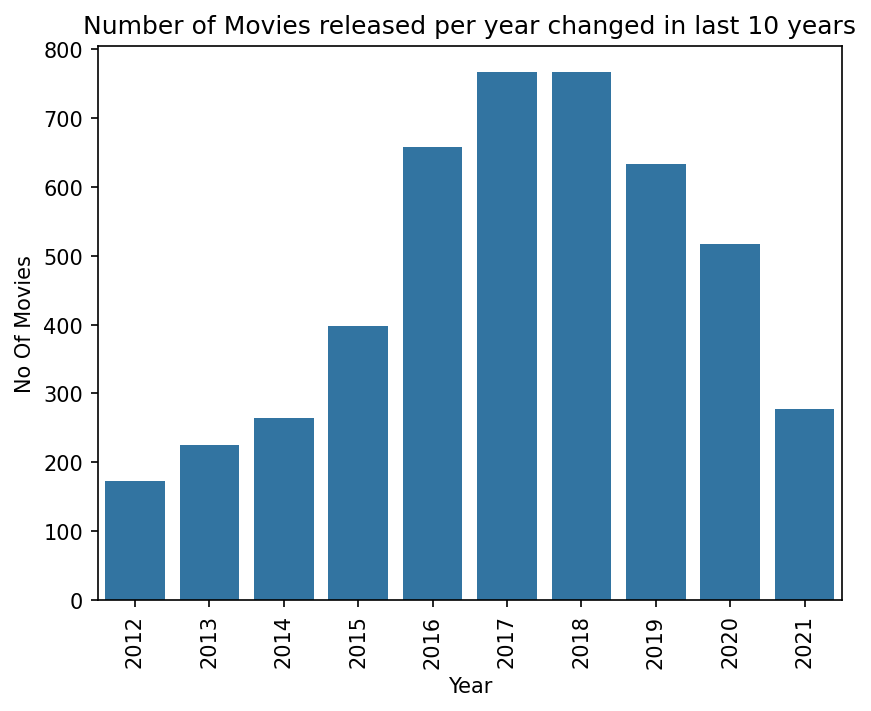

In [87]:
plt.figure(dpi=150)
sns.barplot(x=movies_year_wise.index[:10],
            y=movies_year_wise[:10])
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('No Of Movies')
plt.title('Number of Movies released per year changed in last 10 years')
plt.savefig('Image1.jpg')
plt.show()

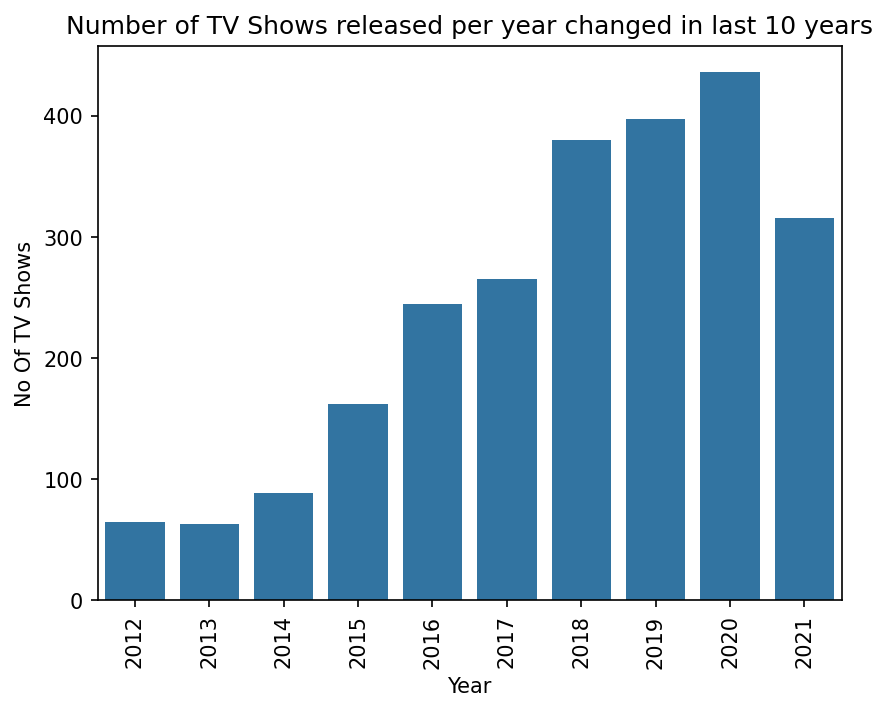

In [88]:
plt.figure(dpi=150)
sns.barplot(x=tvshows_year_wise.index[:10],
            y=tvshows_year_wise[:10])
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('No Of TV Shows')
plt.title('Number of TV Shows released per year changed in last 10 years')
plt.savefig('Image2.jpg')
plt.show()

<h1>Q2 :<br>
How has the number of Movies and TV Shows added to Netflix per year changed over the last 10 years?</h1>

In [89]:
added_year_plot=final_df.groupby(by=['type','release_year']).nunique()['show_id']
added_year_plot

type     release_year
Movie    1942              2
         1943              3
         1944              3
         1945              3
         1946              1
                        ... 
TV Show  2017            265
         2018            380
         2019            397
         2020            436
         2021            315
Name: show_id, Length: 119, dtype: int64

In [90]:
movies_added_per_year=added_year_plot.loc['Movie'].sort_values(ascending=False)
movies_added_per_year

release_year
2018    767
2017    767
2016    658
2019    633
2020    517
       ... 
1946      1
1963      1
1961      1
1959      1
1966      1
Name: show_id, Length: 73, dtype: int64

In [91]:
tvshow_added_per_year=added_year_plot.loc['TV Show'].sort_index(ascending=False)
tvshow_added_per_year

release_year
2021    315
2020    436
2019    397
2018    380
2017    265
2016    244
2015    162
2014     88
2013     63
2012     64
2011     40
2010     40
2009     34
2008     23
2007     14
2006     14
2005     13
2004      9
2003     10
2002      7
2001      5
2000      4
1999      7
1998      4
1997      4
1996      3
1995      2
1994      2
1993      4
1992      3
1991      1
1990      3
1989      1
1988      2
1986      2
1985      1
1981      1
1979      1
1977      1
1974      1
1972      1
1967      1
1963      1
1946      1
1945      1
1925      1
Name: show_id, dtype: int64

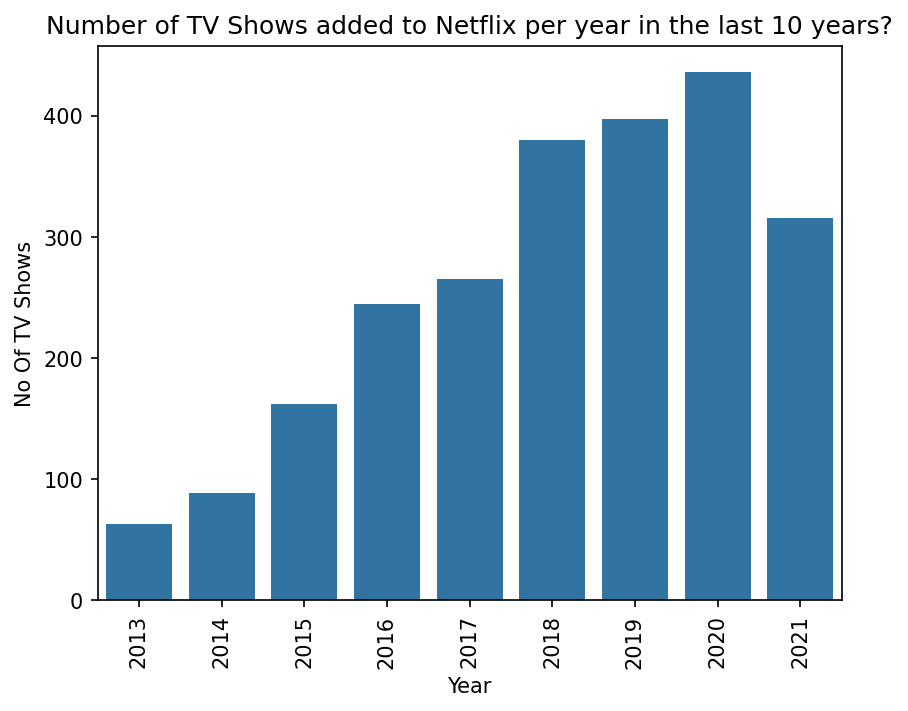

In [92]:
plt.figure(dpi=150)
sns.barplot(x=list(tvshow_added_per_year.index[:9]),
            y=list(tvshow_added_per_year.values[:9]))
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('No Of TV Shows')
plt.title('Number of TV Shows added to Netflix per year in the last 10 years?')
plt.savefig('Image3.jpg')
plt.show()

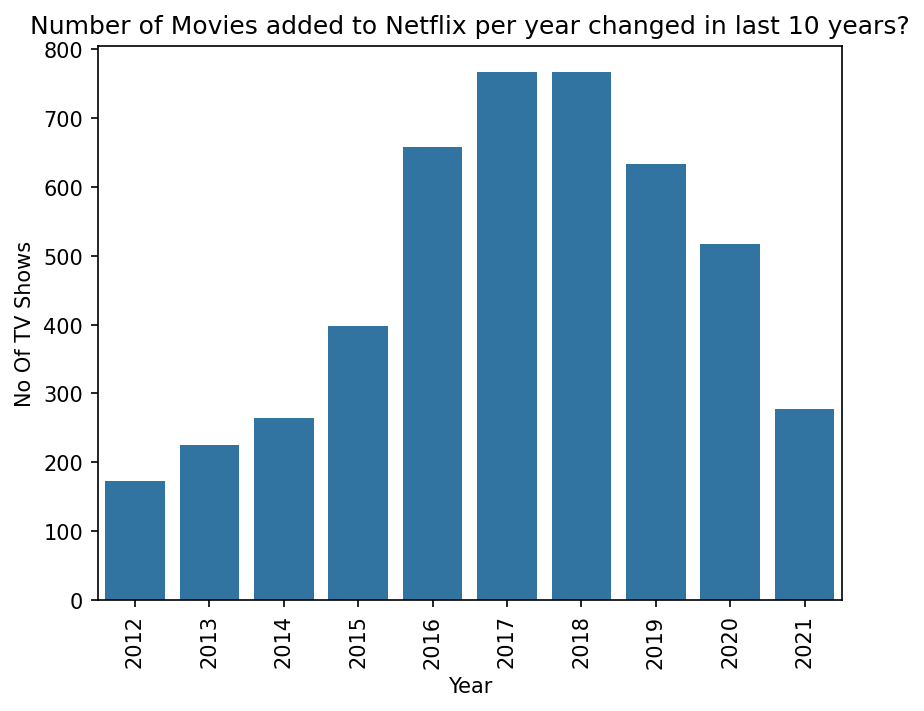

In [93]:
plt.figure(dpi=150)
sns.barplot(x=movies_added_per_year.index[:10],
            y=movies_added_per_year.values[:10])
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('No Of TV Shows')
plt.title('Number of Movies added to Netflix per year changed in last 10 years?')
plt.savefig('Image4.jpg')
plt.show()

<h1>Q3 :<br>
In which months does Netflix add maximum content?</h1>

In [94]:
month_year_plot=final_df.groupby(by='Month Added').nunique()['show_id'].sort_values(ascending=False)

KeyError: 'Month Added'

In [95]:
df['month_name'] = df['date_added'].astype('datetime64[ns]').dt.month_name()

In [96]:
month_year_plot=df.groupby(by='month_name').count()['show_id'].sort_values(ascending=False)
month_year_plot

month_name
July         827
December     813
September    770
April        764
October      760
August       755
March        742
January      738
June         728
November     705
May          632
February     563
Name: show_id, dtype: int64

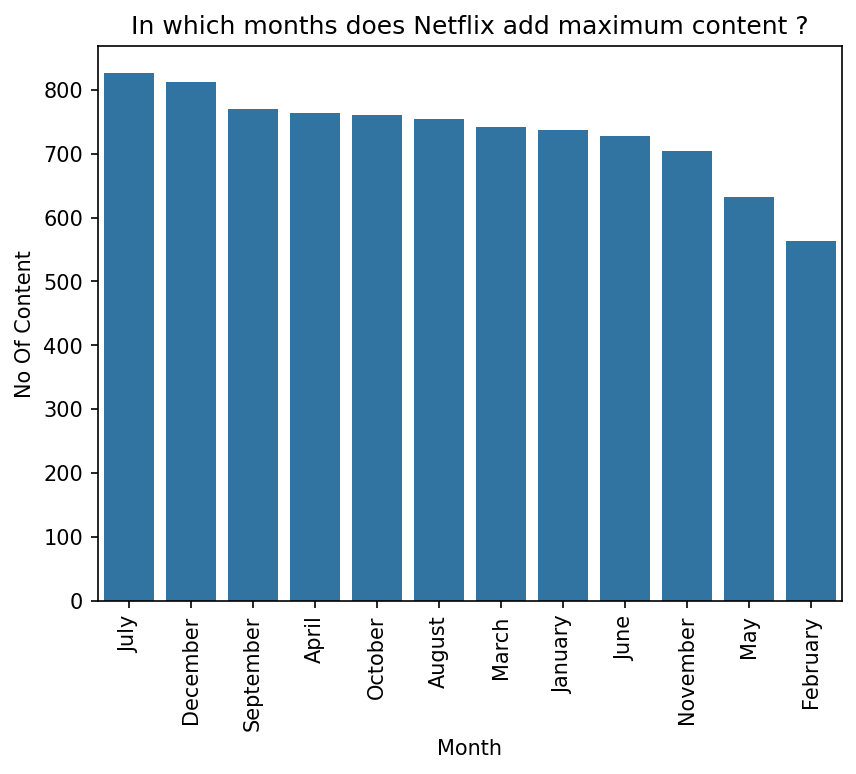

In [97]:
plt.figure(dpi=150)
sns.barplot(x=list(month_year_plot.index),y=list(month_year_plot))
plt.xticks(rotation=90)
plt.xlabel('Month')
plt.ylabel('No Of Content')
plt.title('In which months does Netflix add maximum content ?')
plt.savefig('Image5.jpg')
plt.show()

<h1>Q4 :<br>
Which directors are the most popular?</h1>

In [98]:
director_plot=final_df.groupby('Director').nunique()['show_id'].sort_values(ascending=False)
director_plot

Director
No Director                   2634
Rajiv Chilaka                   22
Jan Suter                       21
Raúl Campos                     19
Suhas Kadav                     16
                              ... 
Çagan Irmak                      1
Ángeles Reiné                    1
Ángel Gómez Hernández            1
Álvaro Longoria                  1
Álvaro Delgado-Aparicio L.       1
Name: show_id, Length: 4994, dtype: int64

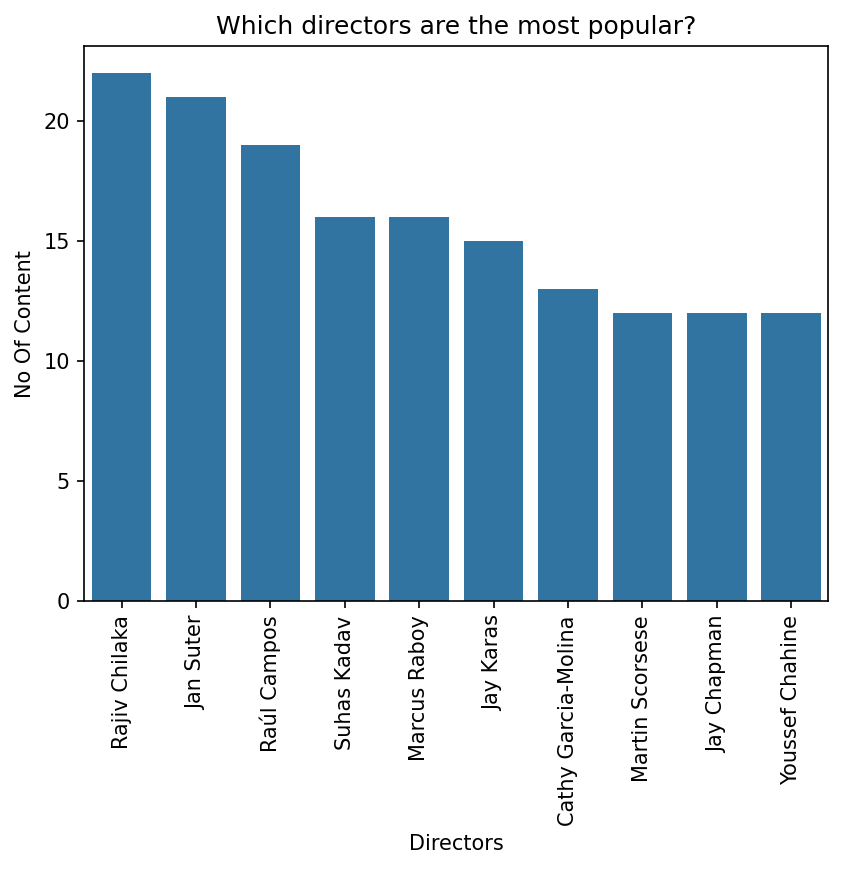

In [99]:
plt.figure(dpi=150)
sns.barplot(x=list(director_plot.index[1:11]),y=list(director_plot[1:11]))
plt.xticks(rotation=90)
plt.xlabel('Directors')
plt.ylabel('No Of Content')
plt.title('Which directors are the most popular?')
plt.savefig('Image6.jpg')
plt.show()

<h1>Q5 :<br>
Which cast members are the most popular?</h1>

In [100]:
cast_plot=final_df.groupby('Cast').nunique()['show_id'].sort_values(ascending=False)
cast_plot

Cast
Others                      825
Anupam Kher                  43
Shah Rukh Khan               35
Julie Tejwani                33
Naseeruddin Shah             32
                           ... 
2Mex                          1
Ṣọpẹ́ Dìrísù                  1
A Boogie Wit tha Hoodie       1
Łukasz "Lotek” Lodkowski      1
Şafak Başkaya                 1
Name: show_id, Length: 36440, dtype: int64

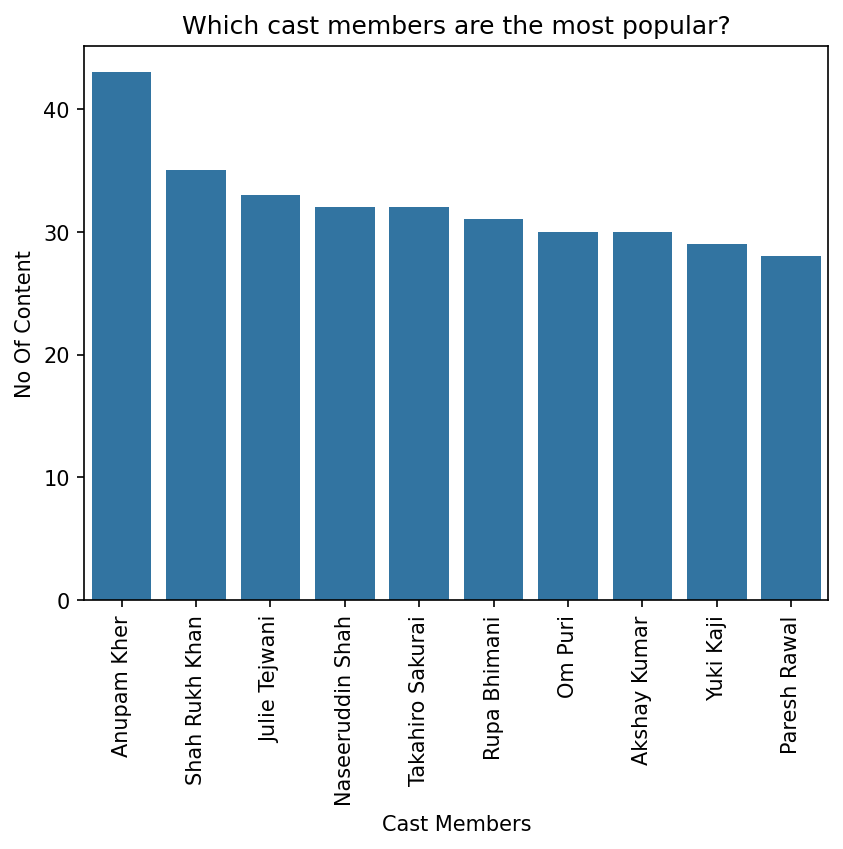

In [101]:
plt.figure(dpi=150)
sns.barplot(x=list(cast_plot.index[1:11]),y=list(cast_plot[1:11]))
plt.xticks(rotation=90)
plt.xlabel('Cast Members')
plt.ylabel('No Of Content')
plt.title('Which cast members are the most popular?')
plt.savefig('Image7.jpg')
plt.show()

<h1>Q6 :<br>
What type of content is mostly added in Netflix in the last 3 years?</h1>

In [102]:
cast_plot=final_df[final_df['release_year']>=2019].groupby('type').nunique()['show_id'].sort_values(ascending=False)
cast_plot

type
Movie      1427
TV Show    1148
Name: show_id, dtype: int64

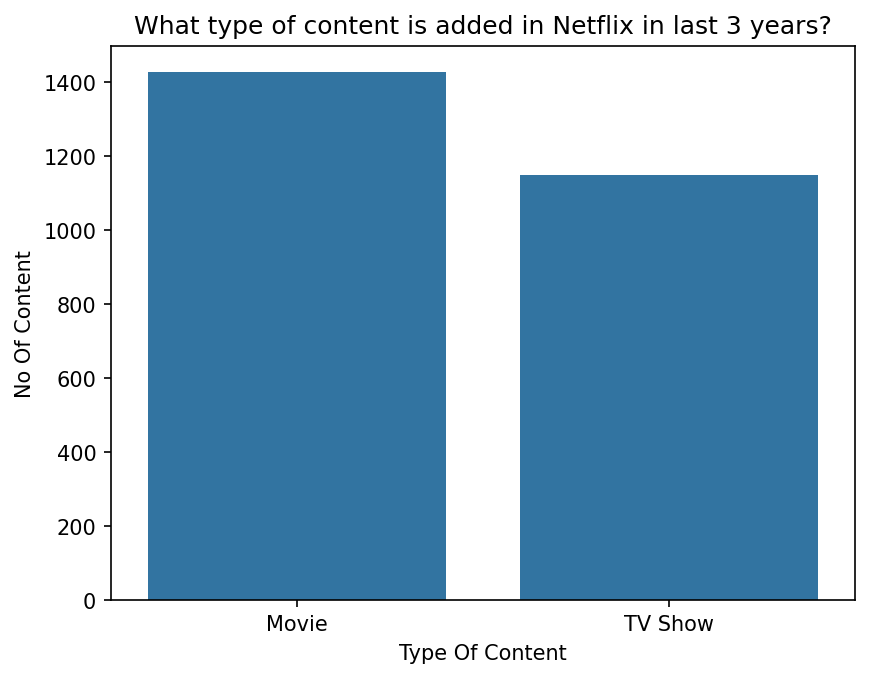

In [103]:
plt.figure(dpi=150)
sns.barplot(x=list(cast_plot.index),y=list(cast_plot))

plt.xlabel('Type Of Content')
plt.ylabel('No Of Content')
plt.title('What type of content is added in Netflix in last 3 years?')
plt.savefig('Image8.jpg')
plt.show()

<h1>Q7 :<br>
In which country is more movies produced?</h1>

In [104]:
country_plot=final_df.groupby('country').nunique()['show_id'].sort_values(ascending=False)
country_plot

country
United States                                          2818
India                                                   972
Country Not Mentioned                                   831
United Kingdom                                          419
Japan                                                   245
                                                       ... 
United States, Spain, Germany                             1
Belgium, Ireland, Netherlands, Germany, Afghanistan       1
Belgium, United Kingdom                                   1
Belgium, United Kingdom, United States                    1
United States, United Kingdom, Canada, China              1
Name: show_id, Length: 749, dtype: int64

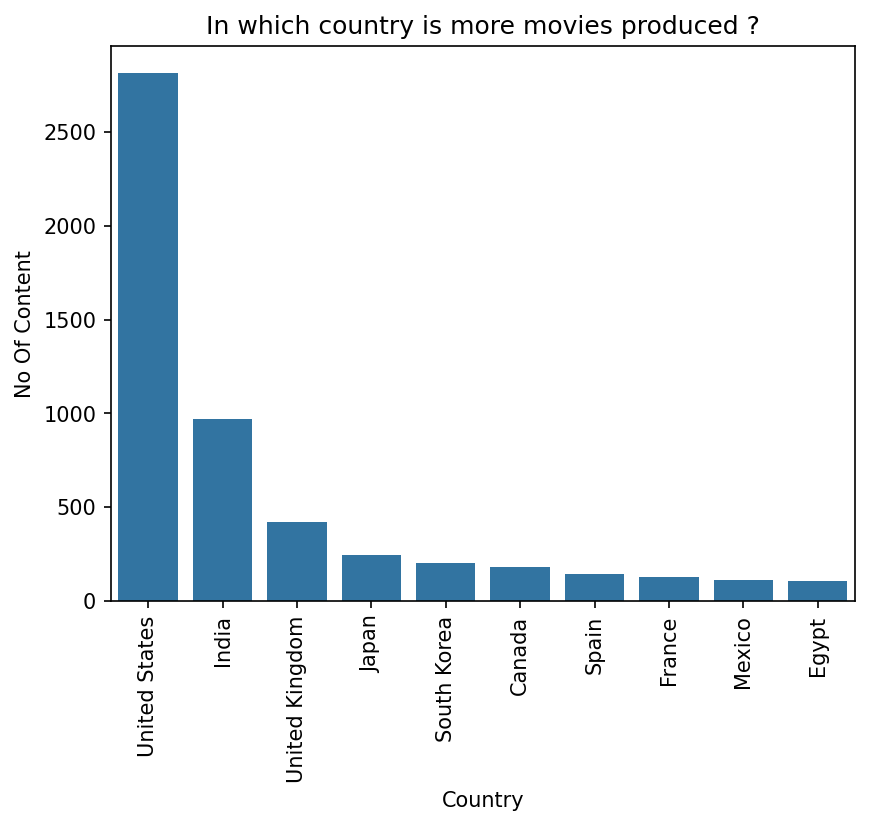

In [105]:
country_plot=final_df.groupby('country').nunique()['show_id'].sort_values(ascending=False)
country_plot
plt.figure(dpi=150)
sns.barplot(x=list(country_plot.iloc[[0, 1, 3, 4, 5, 6, 7, 8, 9, 10]].index),
            y=list(country_plot.iloc[[0, 1, 3, 4, 5, 6, 7, 8, 9, 10]]))
plt.xlabel('Country')
plt.ylabel('No Of Content')
plt.title('In which country is more movies produced ?')
plt.xticks(rotation=90)
plt.savefig('Image9.jpg')
plt.show()

<h1>Q8 :<br>
What kind of rated content is most available in Netflix?
</h1>

In [106]:
final_df['rating'].unique()


array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', nan, 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [107]:
rating_plot=final_df.groupby('rating').nunique()['show_id'].sort_values(ascending=False)
rating_plot

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: show_id, dtype: int64

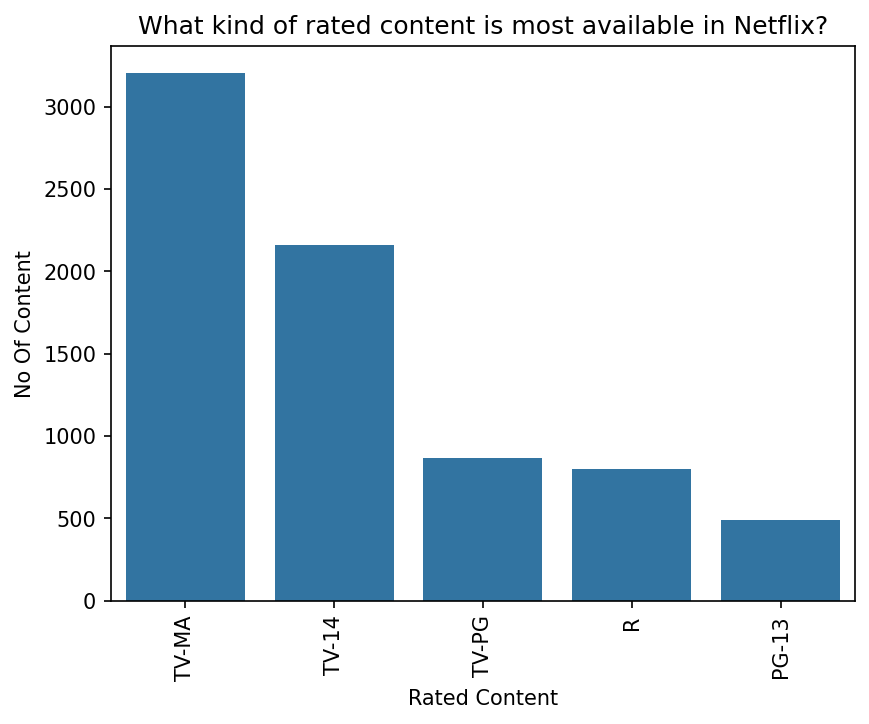

In [108]:
rating_plot=final_df.groupby('rating').nunique()['show_id'].sort_values(ascending=False)
rating_plot
plt.figure(dpi=150)
sns.barplot(x=list(rating_plot.index[:5]),
            y=list(rating_plot[:5]))
plt.xticks(rotation=90)
plt.xlabel('Rated Content')
plt.ylabel('No Of Content')
plt.title('What kind of rated content is most available in Netflix?')
plt.savefig('Image10.jpg')
plt.show()

<h1>Q9 :<br>
Which is the most popular genre?</h1>

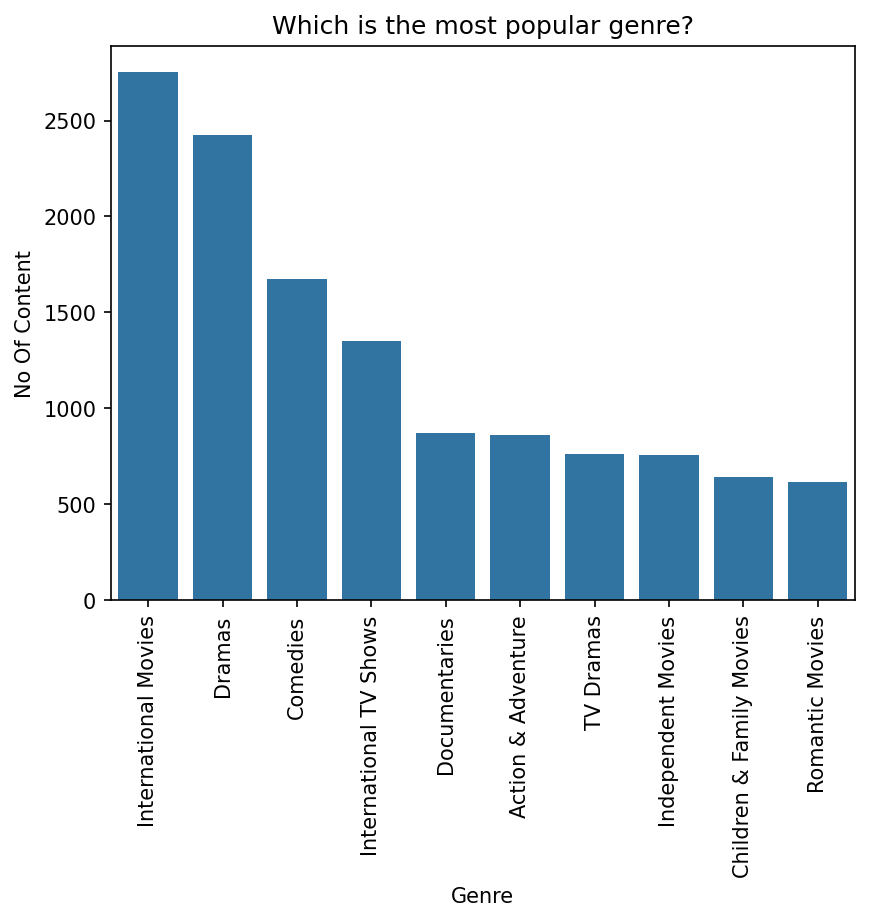

In [109]:
listed_in_plot=final_df.groupby('listed_in').nunique()['show_id'].sort_values(ascending=False)
listed_in_plot
plt.figure(dpi=150)
sns.barplot(x=list(listed_in_plot.index[:10]),
            y=list(listed_in_plot[:10]))
plt.xlabel('Genre')
plt.ylabel('No Of Content')
plt.title('Which is the most popular genre?')
plt.xticks(rotation=90)
plt.savefig('Image11.jpg')
plt.show()

<h1>Q10 :<br>
What is the most preferred duration for each type of content?</h1>

In [110]:
duration_plot=final_df.groupby(by=['type','duration']).nunique()['show_id']
duration_plot

type     duration  
Movie    0-30           130
         121-150        897
         151-180        198
         31-60          357
         61-90         1506
         91-120        2996
         Above 180       47
TV Show  1 Season      1793
         10 Seasons       7
         11 Seasons       2
         12 Seasons       2
         13 Seasons       3
         15 Seasons       2
         17 Seasons       1
         2 Seasons      425
         3 Seasons      199
         4 Seasons       95
         5 Seasons       65
         6 Seasons       33
         7 Seasons       23
         8 Seasons       17
         9 Seasons        9
Name: show_id, dtype: int64

In [111]:
movie_plot=duration_plot.loc['Movie'].sort_values(ascending=False)
movie_plot

duration
91-120       2996
61-90        1506
121-150       897
31-60         357
151-180       198
0-30          130
Above 180      47
Name: show_id, dtype: int64

In [112]:
tv_show_plot=duration_plot.loc['TV Show'].sort_values(ascending=False)
tv_show_plot

duration
1 Season      1793
2 Seasons      425
3 Seasons      199
4 Seasons       95
5 Seasons       65
6 Seasons       33
7 Seasons       23
8 Seasons       17
9 Seasons        9
10 Seasons       7
13 Seasons       3
12 Seasons       2
15 Seasons       2
11 Seasons       2
17 Seasons       1
Name: show_id, dtype: int64

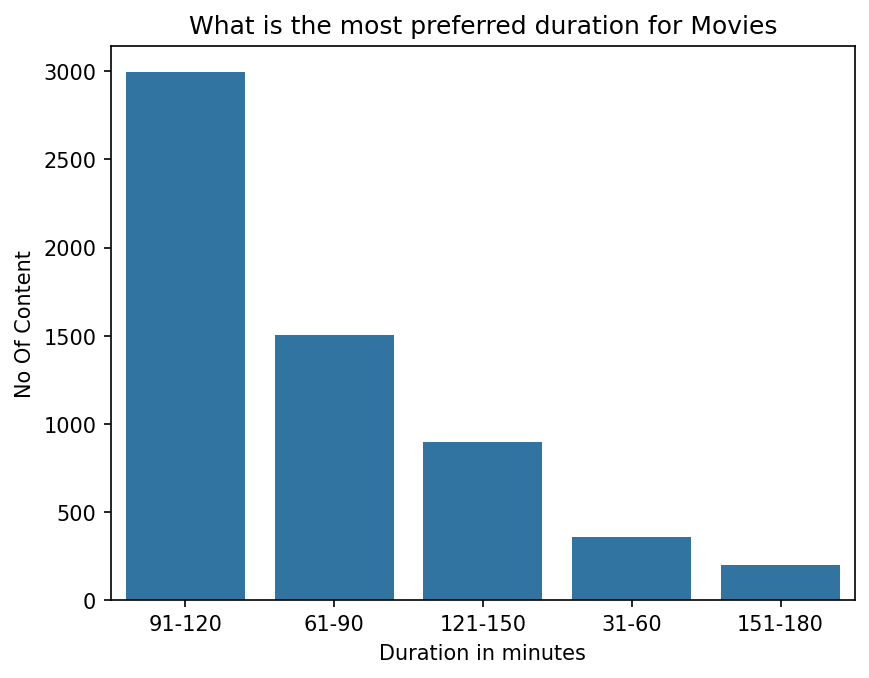

In [113]:
plt.figure(dpi=150)
sns.barplot(x=movie_plot.index[:5],
            y=list(movie_plot[:5]))
# plt.xticks(rotation=90)
plt.xlabel('Duration in minutes')
plt.ylabel('No Of Content')
plt.title('What is the most preferred duration for Movies')
plt.savefig('Image12.jpg')
plt.show()


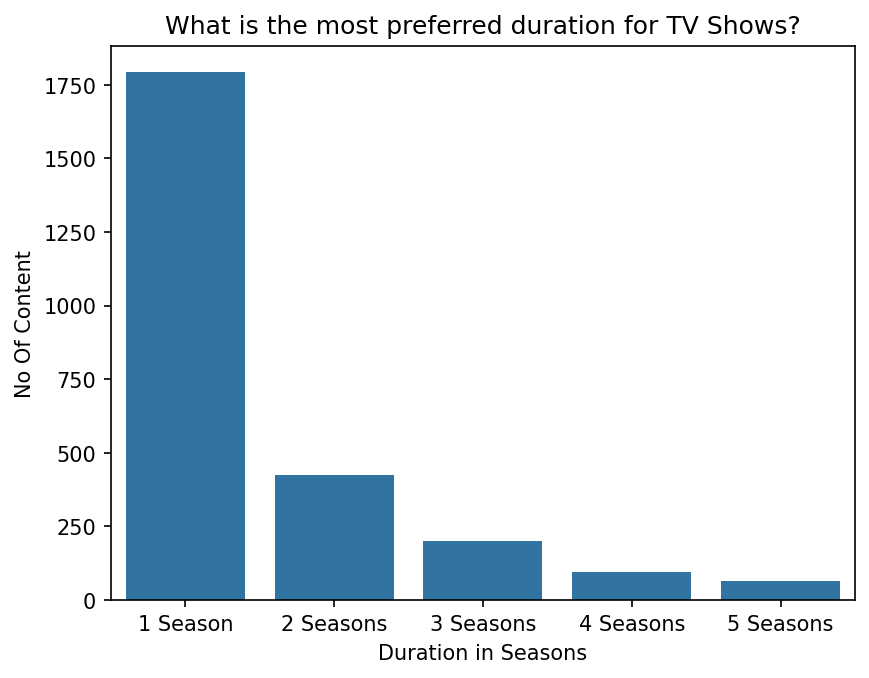

In [114]:
plt.figure(dpi=150)
sns.barplot(x=list(tv_show_plot.index[:5]),
            y=list(tv_show_plot[:5]))
# plt.xticks(rotation=90)
plt.xlabel('Duration in Seasons')
plt.ylabel('No Of Content')
plt.title('What is the most preferred duration for TV Shows?')
plt.savefig('Image13.jpg')
plt.show()

<h1>Final Analysis</h1>
The dataset contains 8,807 rows and 12 columns, from which two nominal columns — description and title — were dropped as they offered limited analytical value, leaving 10 columns. The show_id column serves as the unique identifier for each record. All columns are of object type except release_year, which is an integer. From date_added, a new feature Month_Added was derived (object type), after which the original column was dropped, resulting in 11 columns in total. Using the info() method, missing values were found in director, cast, country, date_added, rating, and duration. These NaN values were filled appropriately based on column characteristics, ensuring no rows were removed. After cleaning, all 11 columns contained 8,807 complete, non-null records, ready for analysis.